<a href="https://colab.research.google.com/github/smithasunilnair/AIDL-Assignment/blob/main/cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset - click https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
# Go to your 'Account' in Kaggle. How? Go to your profile choose Account
# Click 'Create new API token' - json file will be downloaded
# Need to upload it 
# Next Copy the API command from the three dots (next to Download button)


In [ ]:
!mkdir -p ~/.kaggle   #  "mkdir" command will create any necessary parent directories  if they don't already exist
!cp kaggle.json ~/.kaggle/ #This command is often used in the context of setting up the Kaggle environment. Copy the Kaggle API credentials file to the  directory 

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats  #link obtained from kaggle (click the 3 dots) then copy API command and paste here

 98% 1.05G/1.06G [00:09<00:00, 247MB/s]
100% 1.06G/1.06G [00:09<00:00, 124MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')  #copy the path
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#"tensorflow" is an open-source machine learning framework widely used for building and training neural networks and deep learning models.
# keras is a high-level API (Application Programming Interface) included within TensorFlow that provides a user-friendly and intuitive interface for building and training deep learning models.
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# generators  -- used for processing large amt of data in batches by dividing the data (image_dataset_from_directory is the generator function name) 
#REf: https://keras.io/api/data_loading/image/

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', # copy the path of train data by right clicking the train folder
    labels='inferred',  # class a (cat) will be assigned 0 and class b (dog) will be assigned 1 
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  # resizing the images to a size uniformly  -- original dataset are of diff size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',   #https://www.tensorflow.org/api_docs/python/tf/keras/utils/text_dataset_from_directory 
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)   # images are stored as numpy array





Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize  (bringing the pixel values between 0 and 1)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process) 
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction 
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_ds,epochs=20, validation_data=validation_ds)

Epoch 1/20
625/625 [==============================] - 56s 87ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.7087 - val_accuracy: 0.5000
Epoch 2/20
625/625 [==============================] - 54s 86ms/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 3/20
625/625 [==============================] - 52s 82ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 4/20
625/625 [==============================] - 52s 82ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 5/20
625/625 [==============================] - 54s 86ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.7087 - val_accuracy: 0.5000
Epoch 6/20
625/625 [==============================] - 55s 87ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.7087 - val_accuracy: 0.5000
Epoch 7/20
625/625 [==============================] - 55s 88ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.7087 - val_accuracy:

Training accuracy is high but validation accuracy is low

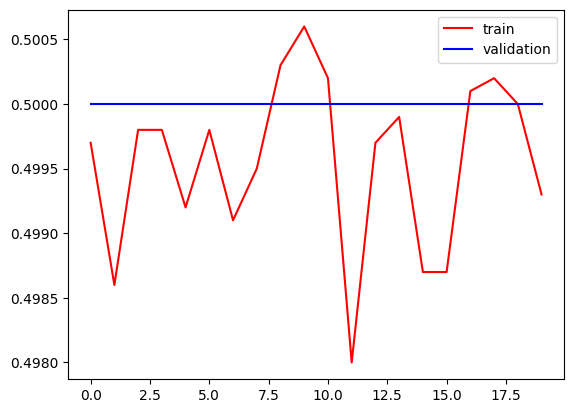

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

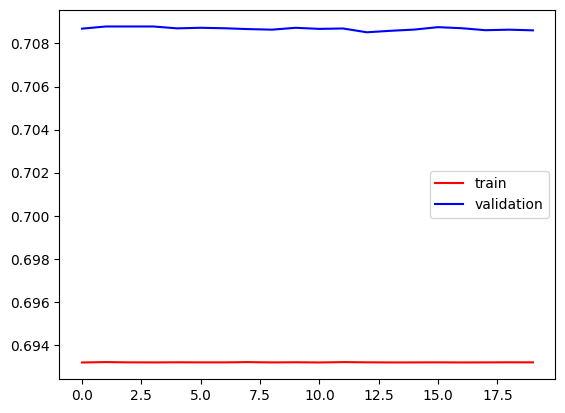

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

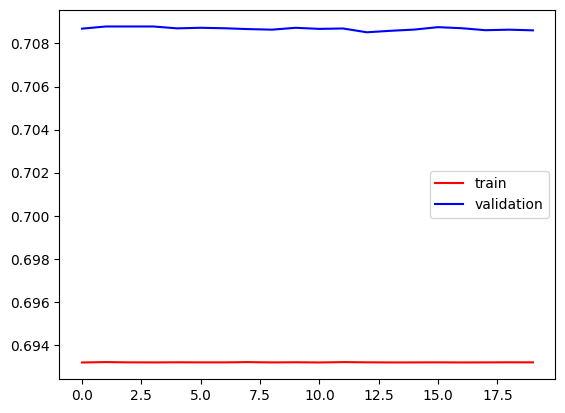

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# So, there is overfitting
# Different ways to reduce overfitting


# Add more data
# Data Augmentation 
# L1/L2 Regularizer
# "Dropout"
# "Batch Norm"
# Reduce complexity

In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test', # copy the path of train data by right clicking the train folder
    labels='inferred', #cat - 0, dog - 1
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  # resizing the images to a size uniformly  -- original dataset are of diff size
)

Found 5000 files belonging to 2 classes.


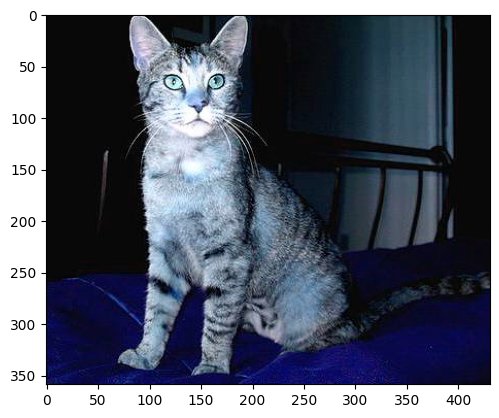

In [ ]:
import cv2
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10000.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(359, 431, 3)

In [ ]:
# Normalize  (bringing the pixel values between 0 and 1)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

test_ds = test_ds.map(process) 

In [ ]:
test_pred = model.predict(test_ds)

157/157 [==============================] - 11s 67ms/step


In [ ]:
test_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_ds, test_pred)
print (cm)

ValueError: ignored

In [ ]:
import numpy as np
pred = np.round(test_pred) 

In [ ]:
import numpy as np
actual_test = np.test_ds

AttributeError: ignored

In [ ]:
pred

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
import cv2  # open cv library

In [ ]:
test_img = cv2.imread('/content/test/dogs/dog.10006.jpg')

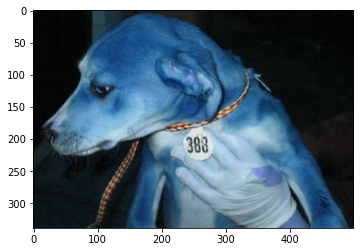

In [ ]:
plt.imshow(test_img)

In [ ]:
this image is probably the BGR; so can be converted to RGB
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
test_img.shape

(339, 499, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))  # trained data size is 256 * 256

In [ ]:
test_input = test_img.reshape((1,256,256,3))  #   1 image of size 256 * 256 and color image with 3 channels

In [ ]:
model.predict(test_input)  # 0 refering to cat and 1 refering to dog

1/1 [==============================] - 0s 25ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/test/cats/cat.10.jpg')

In [ ]:
test_img = cv2.resize(test_img,(256,256))  # trained data size is 256 * 256

In [ ]:
test_input = test_img.reshape((1,256,256,3))  #   1 image of size 256 * 256 and color image with 3 channels

In [ ]:
model.predict(test_input)  # 0 refering to cat and 1 refering to dog